In [9]:
import os
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')

from tsgen import TsGenerator
from nc_explorer import NcExplorer

tsgen = TsGenerator()
exp = NcExplorer()

Declaring class instance from: S3-FRBR:Nc_Explorer
Input NetCDF file folde not set. Proceed at your own risk.


In [11]:
workdir = 'D:\\S3\\L2_WFR_subset\\MANACAPURU'
# img = 'S3A_OL_2_WFR____20180906T134226_20180906T134526_20180907T191944_0179_035_238_3060_MAR_O_NT_002_subset.txt'
# img = 'S3A_OL_2_WFR____20180517T134607_20180517T134907_20180518T192925_0179_031_181_3060_MAR_O_NT_002_subset.txt'
img = 'S3A_OL_2_WFR____20180424T134222_20180424T134522_20180425T194603_0179_030_238_3060_MAR_O_NT_002_subset.txt'
figdate = os.path.basename(img).split('____')[1].split('_')[0]

fullpath = os.path.join(workdir,img)

df = pd.read_csv(fullpath, sep='\t', skiprows=1)

print('RAW:',len(df))

RAW: 64952


In [16]:
# Delete indexes for which Oa01_reflectance is saturated:
indexNames = df[df['Oa01_reflectance:float'] == 1.0000184].index
df.drop(indexNames, inplace=True)

# Add new FLAGS and QUALITY cols
df = tsgen.add_flags_to_df(df)

print('Oa01-drop',len(df))

Oa01-drop 1448


Oa01-drop 1448


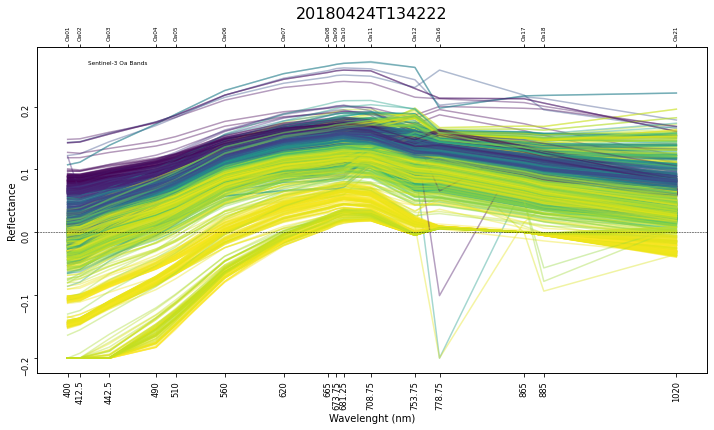

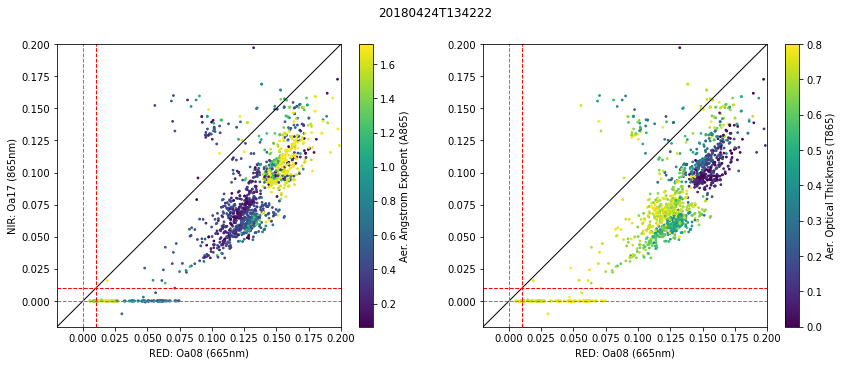

In [5]:
tsgen.s3l2_custom_reflectance_plot(df=df, figure_title=figdate)

tsgen.plot_sidebyside_sktr(title=figdate,
                           x1_data=df['Oa08_reflectance:float'],
                           y1_data=df['Oa17_reflectance:float'],
                           x2_data=df['Oa08_reflectance:float'],
                           y2_data=df['Oa17_reflectance:float'],
                           x_lbl='RED: Oa08 (665nm)',
                           y_lbl='NIR: Oa17 (865nm)',
                           c1_data=df['A865:float'],
                           c1_lbl='Aer. Angstrom Expoent (A865)',
                           c2_data=df['T865:float'],
                           c2_lbl='Aer. Optical Thickness (T865)')

Text(0, 0.5, 'LAT')

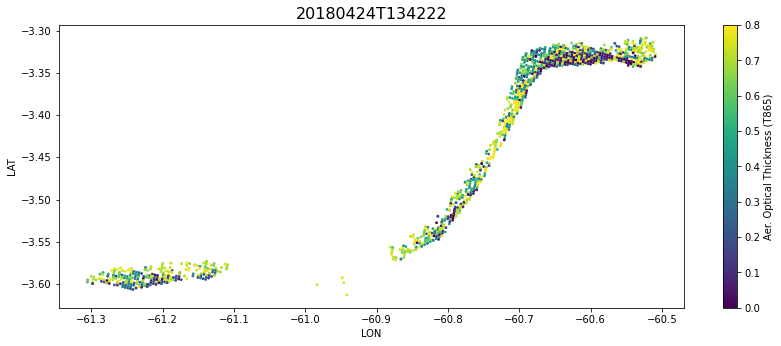

In [17]:
# IMG A - Scatter MAP
plt.rcParams['figure.figsize'] = [14, 5.2]
fig = plt.figure()
ax = plt.axes()
ax.set_title(figdate, fontsize=16)
sktmap = ax.scatter(df['longitude:double'], df['latitude:double'], c=df['T865:float'], cmap='viridis', s=3)
cbar = fig.colorbar(sktmap, ax=ax)
cbar.set_label('Aer. Optical Thickness (T865)')

# ax.set_xlim(-61.34, -60.46)
# ax.set_ylim(-3.65, -3.25)
ax.set_xlabel('LON')
ax.set_ylabel('LAT')

In [23]:
df['FLAGS'].iloc[0]

['LAND', 'INLAND_WATER', 'OCNN_FAIL', 'CLOUD_AMBIGUOUS', 'BPAC_ON', 'HIGHRW']